In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

# Directory with our training non-violation pictures
train_nonviolation_dir = os.path.join('gdrive/MyDrive/Data/Data_collection1/Gorillas_Testing_data_2/Non_violation') 

# Directory with our training violation pictures
train_violation_dir = os.path.join('gdrive/MyDrive/Data/Data_collection1/Gorillas_Testing_data_2/Violation') 

# Directory with our validation non-violation pictures
valid_nonviolation_dir = os.path.join('gdrive/MyDrive/Data/Data_collection1/Gorillas_Validation/Non_violation') 

# Directory with our validation violation pictures
valid_violation_dir = os.path.join('gdrive/MyDrive/Data/Data_collection1/Gorillas_Validation/Violation')

In [ ]:
train_nonviolation_names = [f for f in os.listdir(train_nonviolation_dir)]

print(train_nonviolation_names[:10])

train_violation_names = [f for f in os.listdir(train_violation_dir)]
print(train_violation_names[:10])

validation_nonviolation_hames = [f for f in os.listdir(valid_nonviolation_dir)]
print(validation_nonviolation_hames[:10])

validation_violation_names = [f for f in os.listdir(valid_violation_dir)]
print(validation_violation_names[:10])

print()

print('total training nonviolation images:', len(os.listdir(train_nonviolation_dir)))
print('total training violation images:', len(os.listdir(train_violation_dir)))
print('total validation nonviolation images:', len(os.listdir(valid_nonviolation_dir)))
print('total validation violation images:', len(os.listdir(valid_violation_dir)))

['Copy of _0_1297902 (1).jpg', 'Copy of _0_1297902.jpg', 'Copy of _0_993035.jpg', 'Copy of _0_2264699.jpg', 'Copy of _9_1167519.jpg', 'Copy of _2_4334496.jpg', 'Copy of _2_2431837.jpg', 'Copy of _2_2462297.jpg', 'Copy of _2_3204331.jpg', 'Copy of _2_4004520.jpg']
['mg28.jpg', 'photo16.jpg', 'image34.jpg', 'mg7.jpg', 'mg17 4.16.14 PM.jpg', 'photo12.jpg', 'mg30.jpg', 'image9.jpeg', 'mg11.jpg', 'photo13.jpeg']
['Copy of _0_6460006.jpg', 'Copy of _0_9377298.jpg', 'Copy of _0_7089029.jpg', 'Copy of _0_6874368.jpg', 'Copy of _1_8272983.jpg', 'Copy of _1_6872858.jpg', 'Copy of _1_6386370.jpg', 'Copy of _1_3090079.jpg', 'Copy of _3_3168220.jpg', 'Copy of _3_2980678.jpg']
['image48.jpg', 'image47.jpg', 'mg3.jpg', 'image51.jpg', 'image40.jpg', 'image43.jpg', 'image41.jpg', 'image44.jpg', 'git17.jpeg', 'git23.jpeg']

total training nonviolation images: 92
total training violation images: 95
total validation nonviolation images: 36
total validation violation images: 40


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3

In [ ]:
inc_model = InceptionV3(input_shape = (200, 200, 3), 
                                weights='imagenet',
                                include_top = False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inc_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras.models import Model

x = tf.keras.layers.Flatten()(inc_model.output)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs = inc_model.input, outputs = x)

model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory with our training pictures
train_dir = os.path.join('gdrive/MyDrive/Data/Data_collection1/Gorillas_Testing_data_2') 

# Directory with our validation pictures
valid_dir = os.path.join('gdrive/MyDrive/Data/Data_collection1/Gorillas_Validation') 

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,  # source directory for training images
        classes = ['Non_violation', 'Violation'],
        target_size = (200, 200),  # Images resized to 200x200
        batch_size = 32, #128
        # Use binary labels
        class_mode = 'binary')

# Flow validation images in batches of 16 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        valid_dir,  # source directory for training images
        classes = ['Non_violation', 'Violation'],
        target_size = (200, 200),  # Images resized to 200x200
        batch_size = 16, #32
        # Use binary labels
        class_mode = 'binary',
        shuffle = False)

Found 187 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
history = model.fit(train_generator,
      # steps_per_epoch=9,  
      epochs = 10,
      verbose = 1,
      validation_data = validation_generator)

Epoch 1/10
6/6 [==============================] - 120s 20s/step - loss: 7.5512 - accuracy: 0.6203 - val_loss: 0.8538 - val_accuracy: 0.7500
Epoch 2/10
6/6 [==============================] - 18s 3s/step - loss: 0.9459 - accuracy: 0.8235 - val_loss: 0.1249 - val_accuracy: 0.9474
Epoch 3/10
6/6 [==============================] - 18s 3s/step - loss: 0.0386 - accuracy: 0.9893 - val_loss: 0.3190 - val_accuracy: 0.8816
Epoch 4/10
6/6 [==============================] - 18s 3s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.1867 - val_accuracy: 0.9342
Epoch 5/10
6/6 [==============================] - 18s 3s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1798 - val_accuracy: 0.9211
Epoch 6/10
6/6 [==============================] - 18s 3s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1938 - val_accuracy: 0.9211
Epoch 7/10
6/6 [==============================] - 18s 3s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1985 - val_accuracy: 0.9211
Epoch 8/10
6/6 [================

In [ ]:
test_dir = os.path.join('gdrive/MyDrive/Data/Data_collection2/other_animals')
test_image_generator = ImageDataGenerator(rescale=1./255)


# Testing on all violation images
test_data_gen = test_image_generator.flow_from_directory(
        directory=test_dir,
        classes=['Violation'], 
        target_size=(200, 200),
        batch_size=1,
        shuffle=False)

pred = model.predict(test_data_gen)
len = pred.shape[0]
probabilities = [1 if x > 0.5 else 0 for x in pred] # 0 means correct
print("Violations:", probabilities) # violations checked
print('Accuracy: ', sum(probabilities)/len)

y_true = [1 for i in range(len)]

print()

# Testing on all non-violation images
test_data_gen = test_image_generator.flow_from_directory(
        directory=test_dir,
        classes=['Non_violation'], 
        target_size=(200, 200),
        batch_size=1,
        # class_mode = 'binary'
        shuffle=False)

pred = model.predict(test_data_gen)
len = pred.shape[0]
probabilities2 = [0 if x > 0.5 else 1 for x in pred] # 1 means correct
print("Non_violations:", probabilities2) # non-violation checked
correct = 0
for i in range(len):
    if probabilities2[i]==0: correct+=1
y_true += [0 for i in range(len)]
print('Accuracy: ', correct/len)

NameError: ignored

Overall Accuracy: 0.5789473684210527
F1 score: 0.38461538461538464
Recall: 0.43478260869565216
Precision: 0.3448275862068966


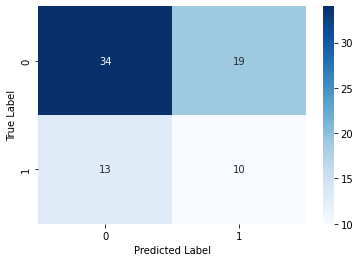

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

probs = probabilities + probabilities2

cm = confusion_matrix(y_true, probs)
map = sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
map.set(xlabel='Predicted Label', ylabel='True Label')

print ('Overall Accuracy:', accuracy_score(y_true, probs))
print ('F1 score:', f1_score(y_true, probs))
print ('Recall:', recall_score(y_true, probs))
print ('Precision:', precision_score(y_true, probs))

In [ ]:
%%shell
jupyter nbconvert --to html /content/InceptionV3_Violation_Classifier_Gorillas.ipynb

[NbConvertApp] Converting notebook /content/InceptionV3_Violation_Classifier_Gorillas.ipynb to html
[NbConvertApp] Writing 314733 bytes to /content/InceptionV3_Violation_Classifier_Gorillas.html
